In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, trapezoid, fixed_quad, quad, tplquad
from scipy.special import roots_legendre

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Sara Calle Muñoz
*Métodos computacionales*

---

#1

Encuentre las integrales

$$\int_0^{\pi/4}  e^{3x}\cdot \sin(x) \, dx$$

---

$$\int_e^{1+e} \frac{1}{x\ln x} \, dx$$

---

* Usando los métodos Trapezoidal y de Simpson. Evalue la convergencia en función del valor de $h$, para esto haga un gráfico logaritmico del error absoluto tomando como valor exacto el dado por `quad`.

* Luego, realice un estudio de la convergencia para `fixed_quad`.






In [ ]:
# para la primera integral

f = lambda x: np.exp(3*x)*np.sin(x)
a = 0
b = np.pi/4
h = 0.1
x = np.arange(a, b + h, h)

integral_simpson = simpson(f(x), x)
integral_trapezoidal = trapezoid(f(x), x = x)
integral_quad = quad(f, a, b)

print(f"Integral 1 con Simpson: {integral_simpson}")
print(f"Integral 1 con Trapezoidal: {integral_trapezoidal}")
print(f"Integral 1 con quad: {integral_quad}")

# para la segunda integral
g = lambda x: 1/(x*np.log(x))
c = np.e
d = 1+np.e
h = 0.1
x2 = np.arange(c, d + h, h)

integral_simpson2 = simpson(g(x2), x2)
integral_trapezoidal2 = trapezoid(g(x2), x = x2)
integral_quad2 = quad(g, c, d)

print(f"Integral 2 con Simpson: {integral_simpson2}")
print(f"Integral 2 con Trapezoidal: {integral_trapezoidal2}")
print(f"Integral 2 con quad: {integral_quad2}")

Integral 1 con Simpson: 1.704444951494799
Integral 1 con Trapezoidal: 1.729562354488913
Integral 1 con quad: (1.5920977078586793, 1.7675835327176418e-14)
Integral 2 con Simpson: 0.2725141807832368
Integral 2 con Trapezoidal: 0.2726585180886653
Integral 2 con quad: (0.2725138805025834, 3.0255118466391664e-15)


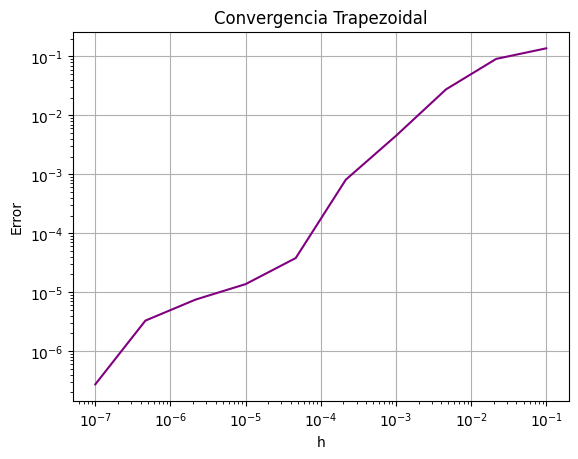

In [ ]:
#para la primera integral con trapezoidal
f = lambda x: np.exp(3*x)*np.sin(x)
a = 0
b = np.pi/4
h_values = np.logspace(-1, -7, 10)
integral = np.zeros_like(h_values, dtype = float)

for i, h in enumerate(h_values):
    x = np.arange(a, b + h, h)
    integral_trapezoidal = trapezoid(f(x), x = x)
    integral[i] = np.abs(integral_trapezoidal - integral_quad[0])

plt.loglog(h_values, integral, color = 'purple')
plt.xlabel("h")
plt.ylabel("Error")
plt.title("Convergencia Trapezoidal")
plt.grid()
plt.show()

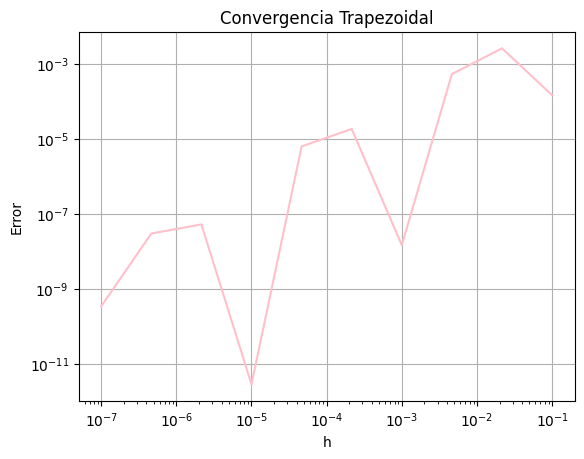

In [ ]:
#para la segunda integral con trapezoidal
g = lambda x: 1/(x*np.log(x))
a = np.e
b = 1+np.e
h_values = np.logspace(-1, -7, 10)
integral2 = np.zeros_like(h_values, dtype = float)

for i, h in enumerate(h_values):
    x = np.arange(a, b + h, h)
    integral_trapezoidal2 = trapezoid(g(x), x = x)
    integral2[i] = np.abs(integral_trapezoidal2 - integral_quad2[0])

plt.loglog(h_values, integral2, color = 'pink')
plt.xlabel("h")
plt.ylabel("Error")
plt.title("Convergencia Trapezoidal")
plt.grid()
plt.show()

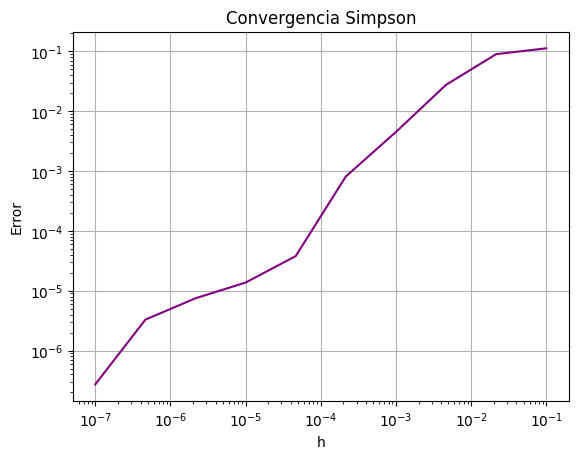

In [ ]:
# para la primera integral con simpson
f = lambda x: np.exp(3*x)*np.sin(x)
a = 0
b = np.pi/4
h_values = np.logspace(-1, -7, 10)
integral = np.zeros_like(h_values, dtype = float)

for i, h in enumerate(h_values):
    x = np.arange(a, b + h, h)
    integral_simpson = simpson(f(x), x)
    integral[i] = np.abs(integral_simpson - integral_quad[0])

plt.loglog(h_values, integral, color = 'purple')
plt.xlabel("h")
plt.ylabel("Error")
plt.title("Convergencia Simpson")
plt.grid()
plt.show()

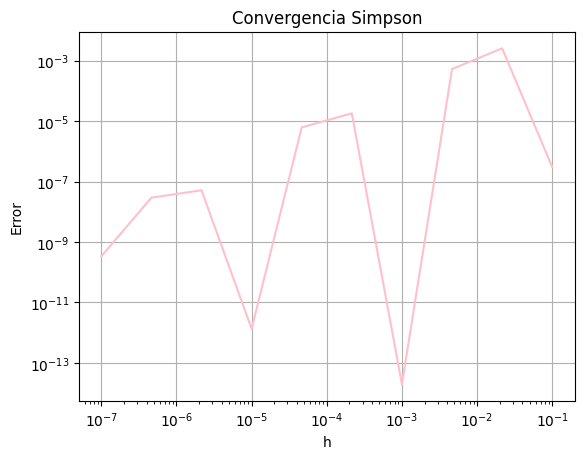

In [ ]:
# para la segunda integral con simpson
g = lambda x: 1/(x*np.log(x))
a = np.e
b = 1+np.e
h_values = np.logspace(-1, -7, 10)
integral = np.zeros_like(h_values, dtype = float)

for i, h in enumerate(h_values):
    x = np.arange(a, b + h, h)
    integral_simpson = simpson(g(x), x)
    integral[i] = np.abs(integral_simpson - integral_quad2[0])

plt.loglog(h_values, integral, color = 'pink')
plt.xlabel("h")
plt.ylabel("Error")
plt.title("Convergencia Simpson")
plt.grid()
plt.show()

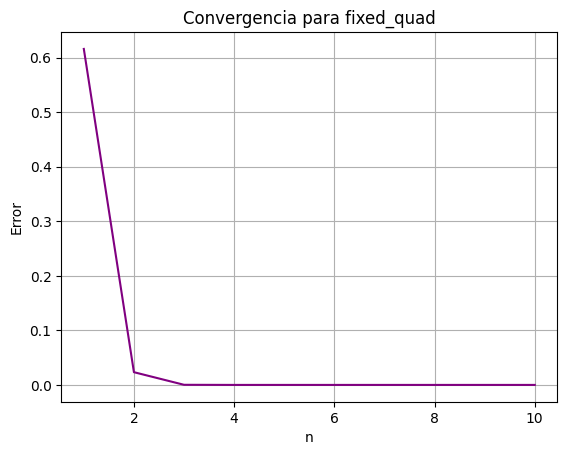

In [ ]:
#convergencia para la primera integral con fixed_quad
f = lambda x: np.exp(3*x)*np.sin(x)
a = 0
b = np.pi/4
n = np.linspace(1, 10, 10)
error = []

for N in n:
    integral = fixed_quad(f, a, b, n = int(N))
    error.append(np.abs(integral[0] - integral_quad[0]))
    #print(f"Integral con el polinomio de orden {N} es: {integral[0]}")

plt.plot(n, error, color = 'purple')
plt.xlabel("n")
plt.ylabel("Error")
plt.title("Convergencia para fixed_quad")
plt.grid()
plt.show()

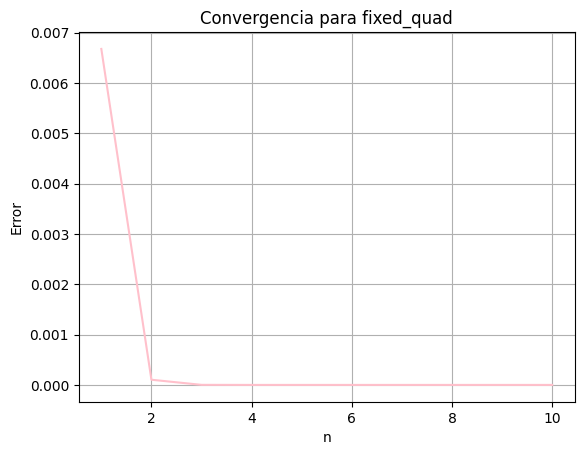

In [ ]:
#convergencia para la segunda integral con fixed_quad
g = lambda x: 1/(x*np.log(x))
a = np.e
b = 1+np.e
n = np.linspace(1, 10, 10)
error = []

for N in n:
    integral = fixed_quad(g, a, b, n = int(N))
    error.append(np.abs(integral[0] - integral_quad2[0]))

plt.plot(n, error, color = 'pink')
plt.xlabel("n")
plt.ylabel("Error")
plt.title("Convergencia para fixed_quad")
plt.grid()
plt.show()

#2

* Resuelva la siguiente integral usando `quad`. Compare su respuesta con `tlquad`

$$
\int_0^\pi \int_0^x \int_0^{xy} \frac{1}{y}\sin\frac{z}{y}\, dz dy dx
$$

In [ ]:
#con quad
def integral_interna(y, x):
  integrando = lambda z : (1/y) * np.sin(z/y)
  resultado, error = quad(integrando, 0, x*y)
  return resultado

def integral_intermedia(x):
  integrando = lambda y : integral_interna(y, x)
  resultado, error = quad(integrando, 0, x)
  return resultado

resultado_triple_quad, error_triple_quad = quad(integral_intermedia, 0, np.pi)
resultado_triple_quad, error_triple_quad

(6.934802200544679, 7.699177074265904e-14)

In [ ]:
#con tplquad
f = lambda z, y, x: (1/y) * np.sin(z/y)
a, b, = 0, np.pi
g, h = lambda x: 0, lambda x: x #los de la mitad
r, q = lambda x, y: 0, lambda x, y: x*y #los más internos

tplquad(f, a, b, g, h, r, q)

(6.934802200544679, 7.699177074265904e-14)

#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [ ]:
def gauss_quad_standard(func, a, b, n): #questions?
  """
  Calcula la integral de una función en el intervalo [a, b]
  utilizando cuadratura gaussiana.

  Parameters:
  - func: La función a integrar.
  - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

  Returns:
  - Aproximación de la integral.
  """
  # Obtener raíces y pesos del polinomio de Legendre
  t, w = roots_legendre(n)
  x = (b - a) / 2 * t + (a + b) / 2

  # Evaluar la suma ponderada
  integral = np.sum(w * func(x)) * (b - a) / 2

  return integral

In [ ]:
#realizamos la integral del punto 2
def integral_interna(y, x, n):
  integrando = lambda z : (1/y) * np.sin(z/y)
  resultado = gauss_quad_standard(integrando,  0, x*y, n)
  return resultado

def integral_intermedia(x, n):
  integrando = lambda y : integral_interna(y, x, n)
  resultado = gauss_quad_standard(integrando,  0, x, n)
  return resultado

def integral_externa(n):
  integrando = lambda x : integral_intermedia(x, n)
  resultado = gauss_quad_standard(integrando,  0, np.pi, n)
  return resultado

n = 5
resultado_gauss_quad = integral_externa(n)
print("Resultado:", resultado_gauss_quad)

#profe no pude encontrar porq no daba el valor correcto :(

Resultado: 9.107318780287503


#4
Usando los métodos trapezoidal, Simpson y cuadratura Gaussiana encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [ ]:
def trapezoidal(f, a, b, n):
  """
  Regla del trapecio para aproximar la integral de f en [a, b] con n puntos.
  Entrada:
  f : función a integrar
  a : límite inferior de integración
  b : límite superior de integración
  n : número de subintervalos (debe ser un entero positivo)
  Salida:
  integral : valor aproximado de la integral de f en [a, b]
  """
  if n <= 0 or not isinstance(n, int):
      raise ValueError("n debe ser un entero positivo")
  if a >= b:
      raise ValueError("El límite inferior a debe ser menor que el límite superior b")
  if not callable(f):
      raise ValueError("f debe ser una función callable")

  h = (b - a) / n
  # inicializamos en los valores extremos

  integral = f(a) + f(b)
  # sumamos los terminos
  for i in range(1, n):
      # el nodo donde vamos a trazar la linea
      xi = a + i * h #punto del subintervalo
      # valores de la sumatoria
      integral += 2* f(xi) # valor de la función en el subintervalo
  return h / 2 * integral

In [ ]:
def simpson13(f, a , b, n):
  """
  Cuadratura compuesta de Simpson 1/3 para aproximar la integral de f en [a, b] con n puntos.
  Entrada:
  f : función a integrar
  a : límite inferior de integración
  b : límite superior de integración
  n : número de subintervalos (debe ser un entero positivo y par)
  Salida:
  integral : valor aproximado de la integral de f en [a, b]
  """
  if n <= 0 or not isinstance(n, int):
      raise ValueError("n debe ser un entero positivo")
  if n % 2 == 1:
      raise ValueError("n debe ser un número par para Simpson 1/3")
  if a >= b:
      raise ValueError("El límite inferior a debe ser menor que el límite superior b")
  if not callable(f):
      raise ValueError("f debe ser una función callable")

  #el método no admite numeros impares
  if n % 2 == 1:
      raise ValueError('n debe ser par')
  h = (b - a) / n
  # sumas auxiliares
  integral = f(a) + f(b)
  integral_par = 0 #sumas pares
  integral_impar = 0 #sumas impares
  for i in range(1, n):
      xi = a + i * h #recorremos los nodos
      if i % 2 == 1:
          integral_impar += 4 * f(xi) # si es impar multiplicamos f(xi) por 4 y sumas
      else:
          integral_par += 2 * f(xi) # si es par multiplicamos f(xi) por 2 y sumas

  integral += integral_impar + integral_par # sumamos todas las auxiliares

  return h/3 * integral

In [ ]:
#con mis métodos definidos
def comparacion_trapezoid(f, a, b, n):
  integral_anterior = 9999
  integral_actual = trapezoidal(f, a, b, n)
  while abs(integral_actual - integral_anterior) > 1e-5:
    integral_anterior = integral_actual
    n *= 5
    integral_actual = trapezoidal(f, a, b, n)
  print(integral_actual)

def comparacion_simpson(f, a, b, n):
  integral_anterior = 9999
  integral_actual = simpson13(f, a, b, n)
  while abs(integral_actual - integral_anterior) > 1e-5:
    integral_anterior = integral_actual
    n *= 5
    integral_actual = simpson13(f, a, b, n)
  print(integral_actual)

def comparacion_cuadratura(f, a, b, n):
  integral_anterior = 9999
  integral_actual = trapezoidal(f, a, b, n)
  while abs(integral_actual - integral_anterior) > 1e-5:
    integral_anterior = integral_actual
    n *= 5
    integral_actual = trapezoidal(f, a, b, n)
  print(integral_actual)

In [ ]:
# definiendo una tolerancia y usando los metodos de scipy
#para el método trapezoidal
def tol(f, a, b, n, tol=1e-5):
    valor = 1.0
    integral_anterior = 0.0

    while valor > tol:
        x = np.linspace(a, b, n + 1)
        y = f(x)
        integral = trapezoid(y, x)
        valor = abs(integral - integral_anterior)
        integral_anterior = integral
        n *= 2

    return integral

In [ ]:
#para el método de cuadratura gaussiana
def tol_gauss(f, a, b, n, tol=1e-5):
    error = 1.0
    integral_anterior = 0.0

    while error > tol:
        integral, _ = fixed_quad(f, a, b, n=n)
        error = abs(integral - integral_anterior)
        integral_anterior = integral
        n *= 2

    return integral

In [ ]:
#para el método de simpson
def tol_simpson(f, a, b, n, tol=1e-5):
    valor = 1.0
    integral_anterior = 0.0

    while valor > tol:
        x = np.linspace(a, b, n + 1)
        y = f(x)
        integral = simpson(y, x)
        valor = abs(integral - integral_anterior)
        integral_anterior = integral
        n *= 2

    return integral

In [ ]:
#para la primera integral
f = lambda x: 1/np.sqrt(np.tan(x))
a = 0.00001
b = np.pi/2
n = 10
tol(f, a, b, n)
tol_gauss(f, a, b, n)
tol_simpson(f, a, b, n)
print(f'la integral con trapezoidal es: {tol(f, a, b, n)}')
print(f'la integral con cuadratura gaussiana es: {tol_gauss(f, a, b, n)}')
print(f'la integral con simpson es: {tol_simpson(f, a, b, n)}')

la integral con trapezoidal es: 2.2151188041538066
la integral con cuadratura gaussiana es: 2.2151169031995774
la integral con simpson es: 2.215117012358098


In [ ]:
#para la segunda integral
f = lambda x: np.cos(x)/(x**3)
a = 1
b = 20 #no es necesario ir hasta infinito
n = 20
tol(f, a, b, n)
tol_gauss(f, a, b, n)
tol_simpson(f, a, b, n)
print(f'la integral con trapezoidal es: {tol(f, a, b, n)}')
print(f'la integral con cuadratura gaussiana es: {tol_gauss(f, a, b, n)}')
print(f'la integral con simpson es: {tol_simpson(f, a, b, n)}')

la integral con trapezoidal es: 0.018224065889660468
la integral con cuadratura gaussiana es: 0.01822124024873918
la integral con simpson es: 0.01822148515109793


In [ ]:
#para la tercera integral
a3 = 0
b3 = np.pi/4

def f3(y, x):
    return 1 / np.sqrt(1 - y ** 2)

def integral_exterior(x):
    return quad(lambda y: f3(y, x), 0, np.sin(x), limit=500)[0]

integral_3 = quad(integral_exterior, a3, b3, limit=500)[0]
print(f'la integral con cuadratura gaussiana es: {integral_3}')

la integral con cuadratura gaussiana es: 0.30842513753404244
